In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import networkx as nx
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

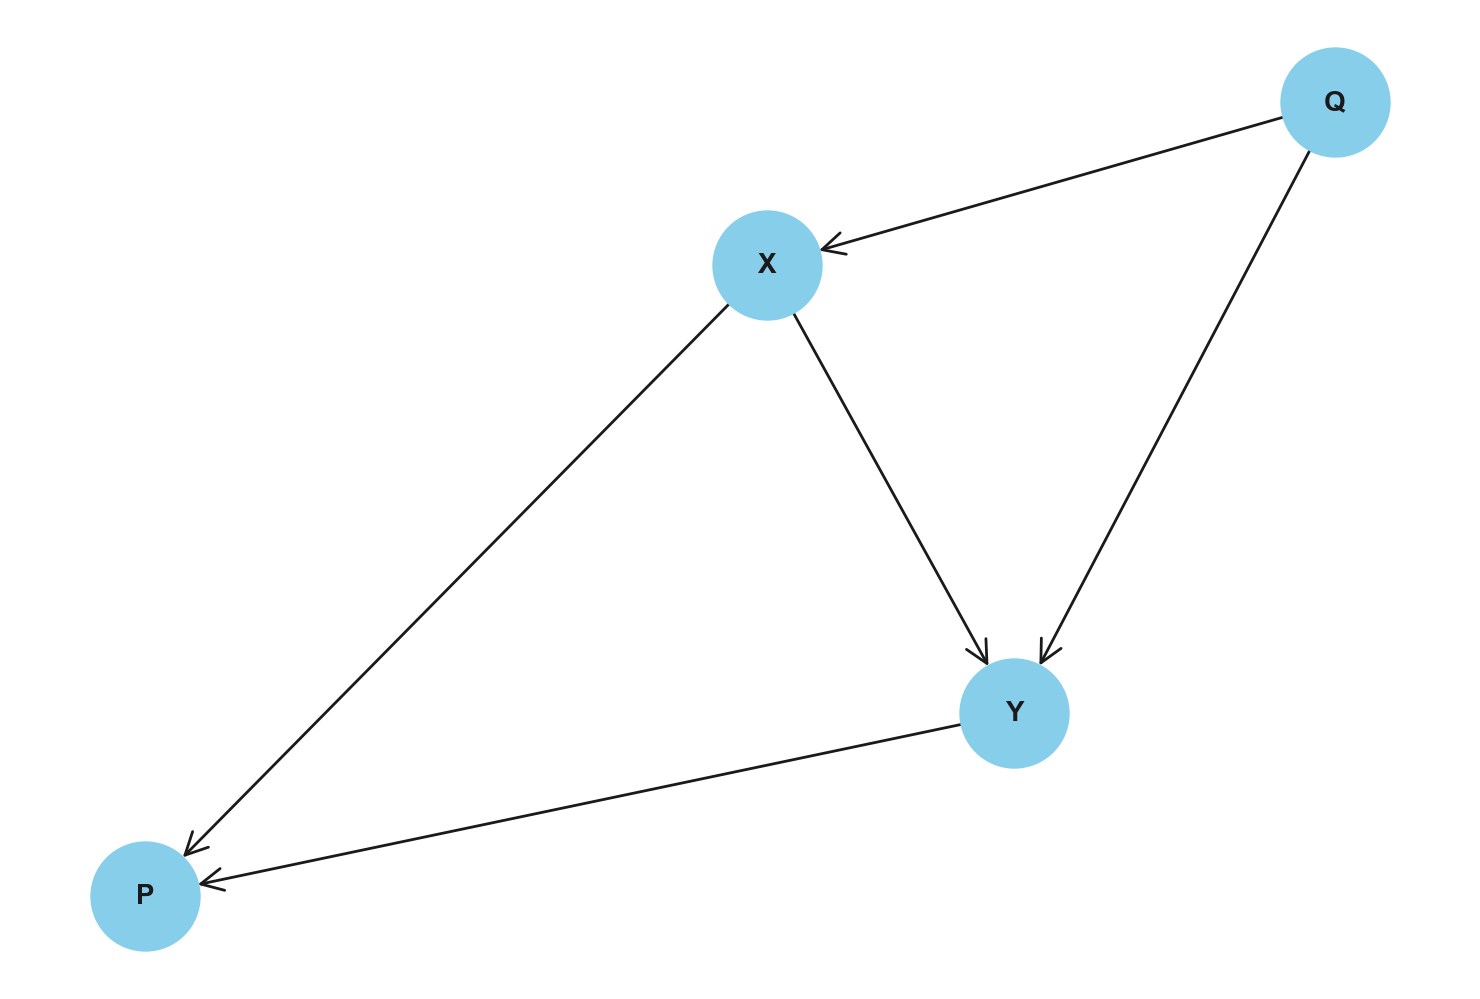

In [3]:
graph = nx.DiGraph()
#graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
graph.add_edges_from([("X", "Y"), ("X", "P"), ("Y", "P"), ("Q", "X"), ("Q", "Y")])

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20, arrowstyle="->")
plt.show()

In [4]:
N = 5_000
Q = rng.normal(size=N)
X = rng.normal(loc=0.14*Q, scale=0.4, size=N)
Y = rng.normal(loc=0.7*X + 0.11*Q, scale=0.24, size=N)
P = rng.normal(loc=0.43*X + 0.21*Y, scale=0.22, size=N)
df = pd.DataFrame({"Q": Q, "X": X, "Y": Y, "P": P})

df.head()

,Q,X,Y,P
0,-1.423825,-0.421305,-0.498653,0.039523
1,1.263728,0.518683,0.576752,0.059713
2,-0.870662,0.354544,0.157422,0.367875
3,-0.259173,0.135539,0.307791,0.016444
4,-0.075343,-0.048982,0.114759,0.134512


In [5]:
model = bmb.Model("Y ~ X", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:02.201911


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7971.76it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:01<00:00, 8858.63it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7683.58it/s]

Running chain 3:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7549.45it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8963.36it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9317.05it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9106.28it/s]

Running chain 3:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 9078.05it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1236.37it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1237.48it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1238.36it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1239.29it/s]


Sampling time = 0:00:01.832333


Transforming variables...


Transformation time = 0:00:00.062702


Computing Log Likelihood...


Log Likelihood time = 0:00:00.214505


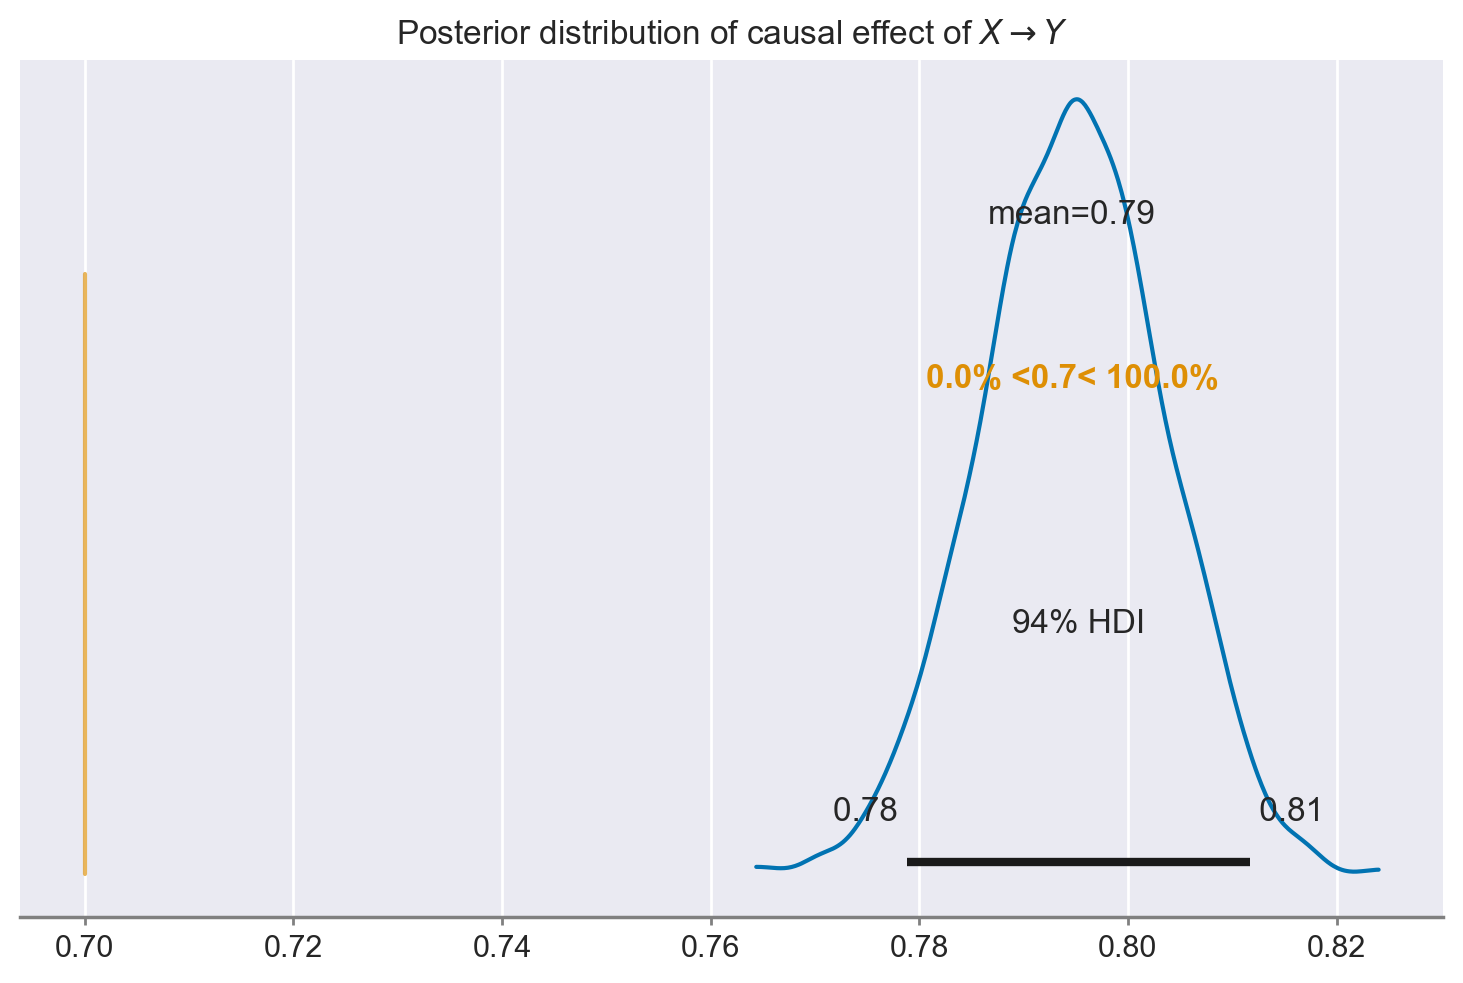

In [6]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [7]:
model = bmb.Model("Y ~ Q + X + P", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.804071


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  15%|███████▉                                             | 300/2000 [00:01<00:00, 2997.96it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3861.82it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3812.69it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4315.85it/s]

Running chain 3:  50%|██████████████████████████                          | 1000/2000 [00:01<00:00, 4980.53it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5253.66it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5229.93it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5458.78it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5467.14it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5624.33it/s]

Running chain 2:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 5689.77it/s]

Running chain 0:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 5719.08it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1031.00it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1031.57it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1032.47it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1033.20it/s]


Sampling time = 0:00:02.025156


Transforming variables...


Transformation time = 0:00:00.048611


Computing Log Likelihood...


Log Likelihood time = 0:00:00.250455


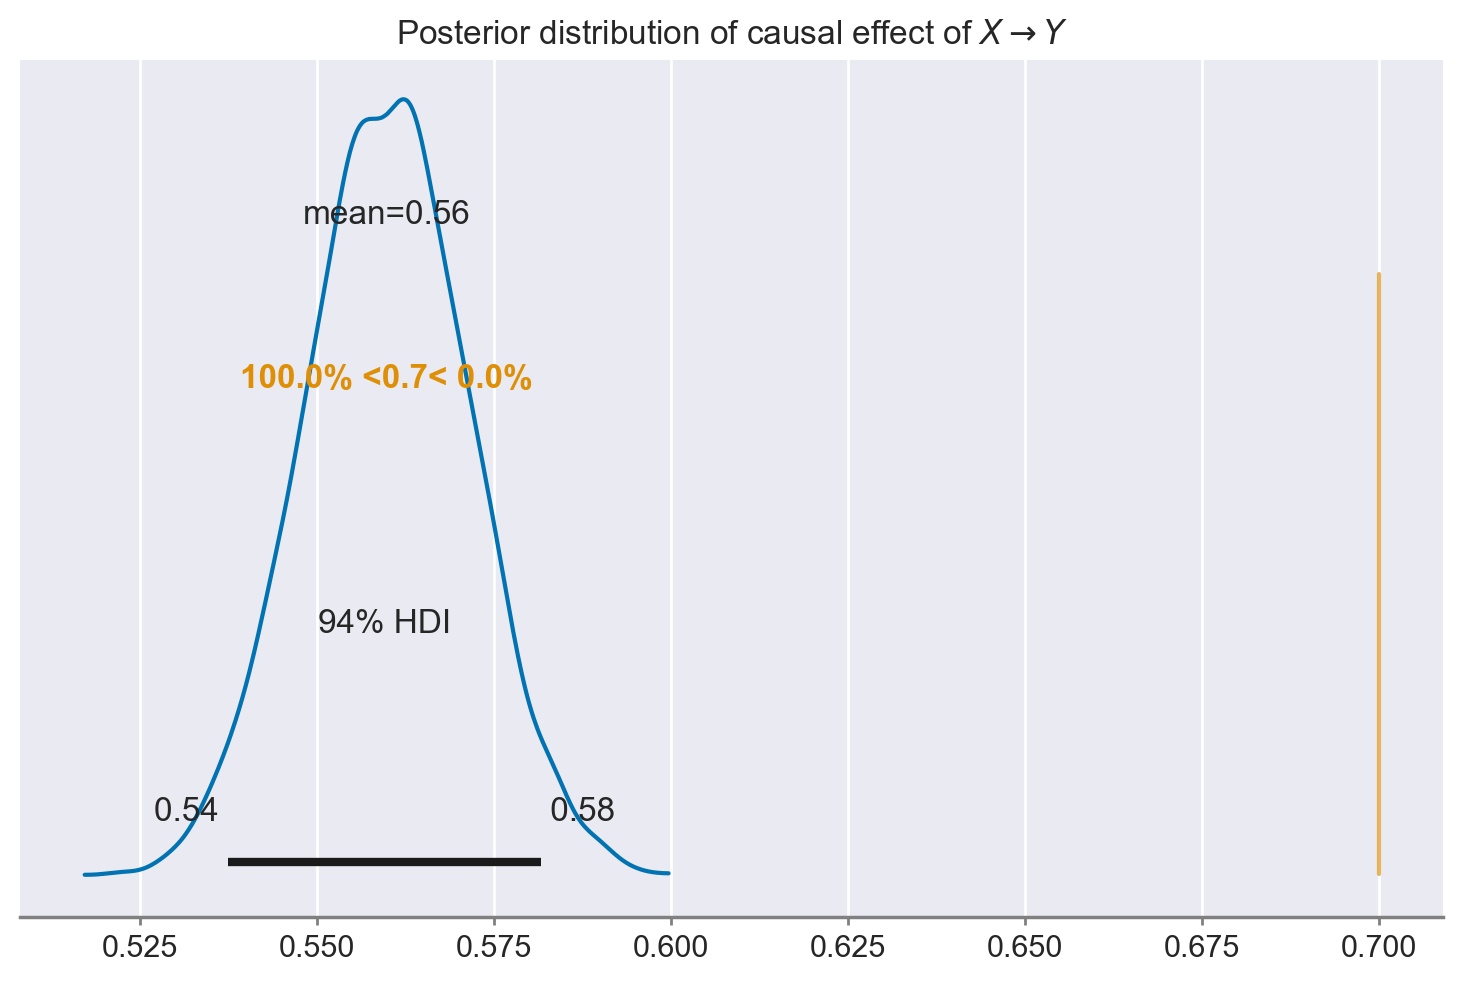

In [8]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [9]:
model = bmb.Model("Y ~ X + Q", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.649432


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4827.00it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5697.47it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5479.77it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5370.62it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6526.35it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6866.24it/s]

Running chain 0:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6739.15it/s]

Running chain 2:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6609.09it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1210.72it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1211.58it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1212.88it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1213.97it/s]

Sampling time = 0:00:01.732842


Transforming variables...


Transformation time = 0:00:00.043518


Computing Log Likelihood...


Log Likelihood time = 0:00:00.233297


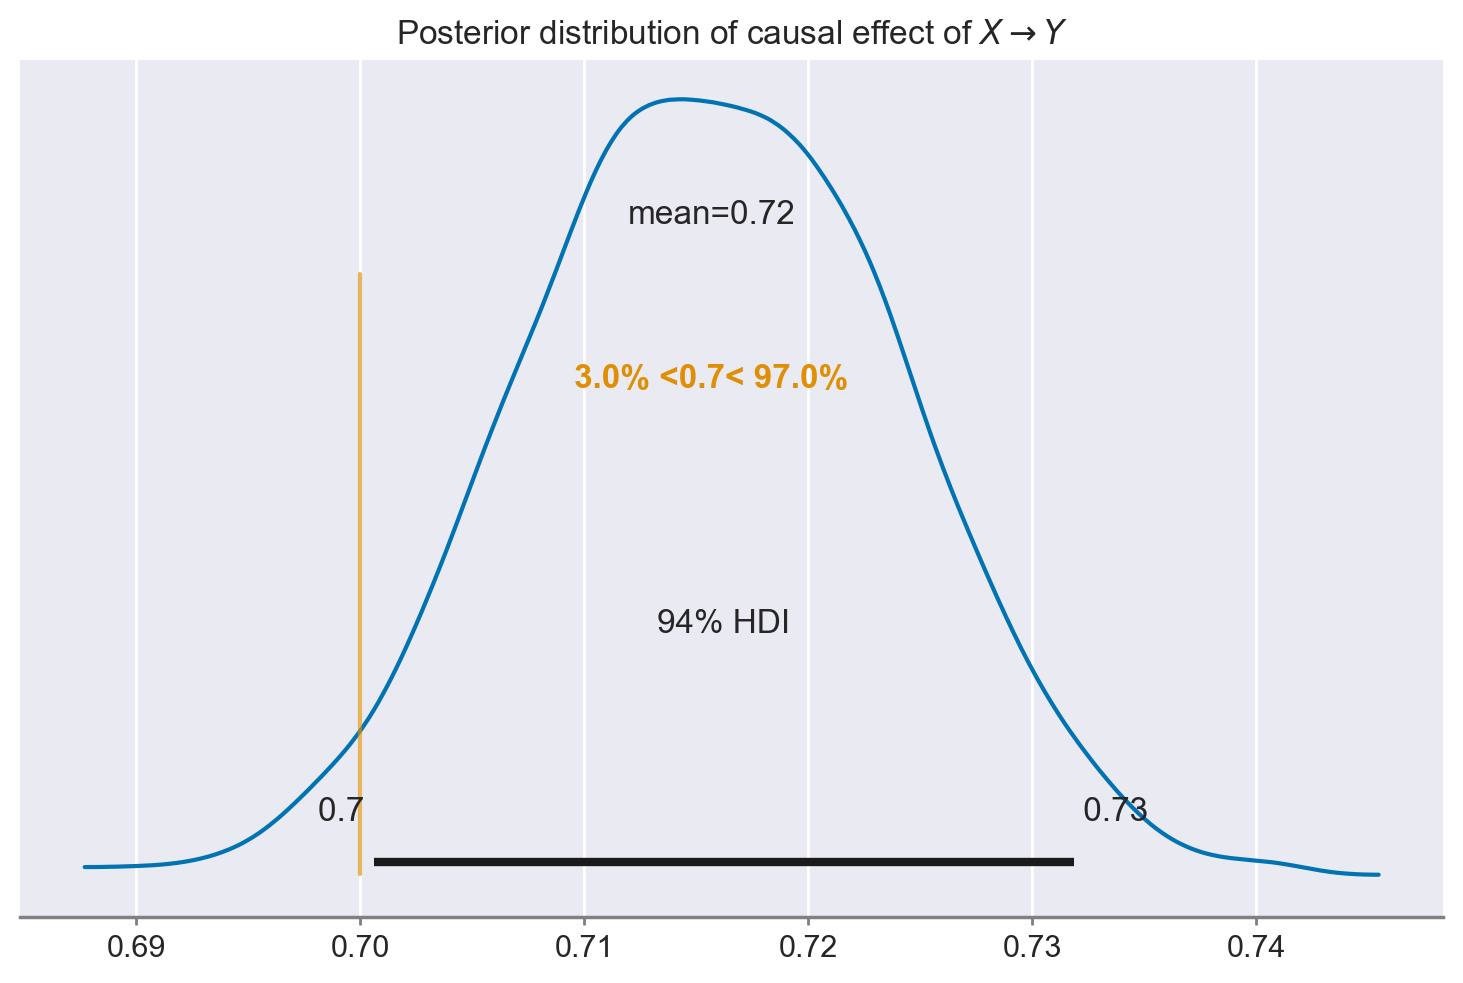

In [10]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

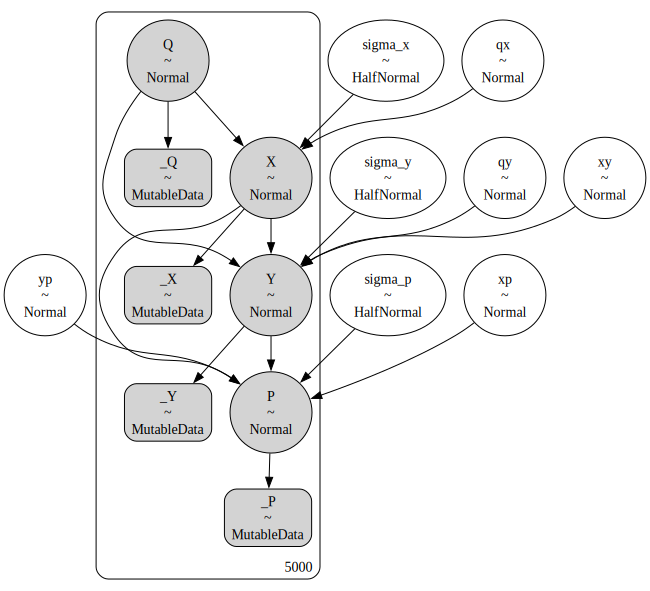

In [11]:
with pm.Model() as model:
    # data
    _Q = pm.MutableData("_Q", df["Q"])
    _X = pm.MutableData("_X", df["X"])
    _Y = pm.MutableData("_Y", df["Y"])
    _P = pm.MutableData("_P", df["P"])

    # priors on slopes
    # x ~ q
    qx = pm.Normal("qx")
    # y ~ x + q
    xy = pm.Normal("xy")
    qy = pm.Normal("qy")
    # p ~ x + y
    xp = pm.Normal("xp")
    yp = pm.Normal("yp")

    # priors on sd's
    sigma_x = pm.HalfNormal("sigma_x")
    sigma_y = pm.HalfNormal("sigma_y")
    sigma_p = pm.HalfNormal("sigma_p")
    
    # model
    Q = pm.Normal("Q", observed=_Q)
    X = pm.Normal("X", mu=qx*Q, sigma=sigma_x, observed=_X)
    Y = pm.Normal("Y", mu=xy*X + qy*Q, sigma=sigma_y, observed=_Y)
    P = pm.Normal("P", mu=xp*X + yp*Y, sigma=sigma_p, observed=_P)

pm.model_to_graphviz(model)

In [12]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.061955


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1217.35it/s]

Running chain 2:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1207.37it/s]

Running chain 1:  10%|█████▍                                                | 200/2000 [00:02<00:01, 999.36it/s]

Running chain 3:  10%|█████▍                                                | 200/2000 [00:02<00:01, 958.94it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1542.92it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1528.68it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1361.90it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1345.48it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1695.51it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1684.15it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1573.79it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1546.25it/s]

Running chain 2:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1950.75it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1957.73it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1929.71it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1867.15it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1953.63it/s]

Running chain 0:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1931.11it/s]

Running chain 3:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1883.54it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1970.90it/s]

Running chain 0:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 1903.11it/s]

Running chain 2:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 2058.21it/s]

Running chain 1:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 1977.65it/s]

Running chain 3:  70%|████████████████████████████████████▍               | 1400/2000 [00:02<00:00, 1987.26it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 1931.70it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 2101.70it/s]

Running chain 1:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:02<00:00, 1977.15it/s]

Running chain 3:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 2038.85it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 1960.86it/s]

Running chain 1:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 1982.45it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:02<00:00, 2131.34it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 2059.34it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 661.38it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 661.57it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 661.85it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 662.09it/s]

Sampling time = 0:00:03.129295


Transforming variables...


Transformation time = 0:00:00.065147


Computing Log Likelihood...


Log Likelihood time = 0:00:00.715963


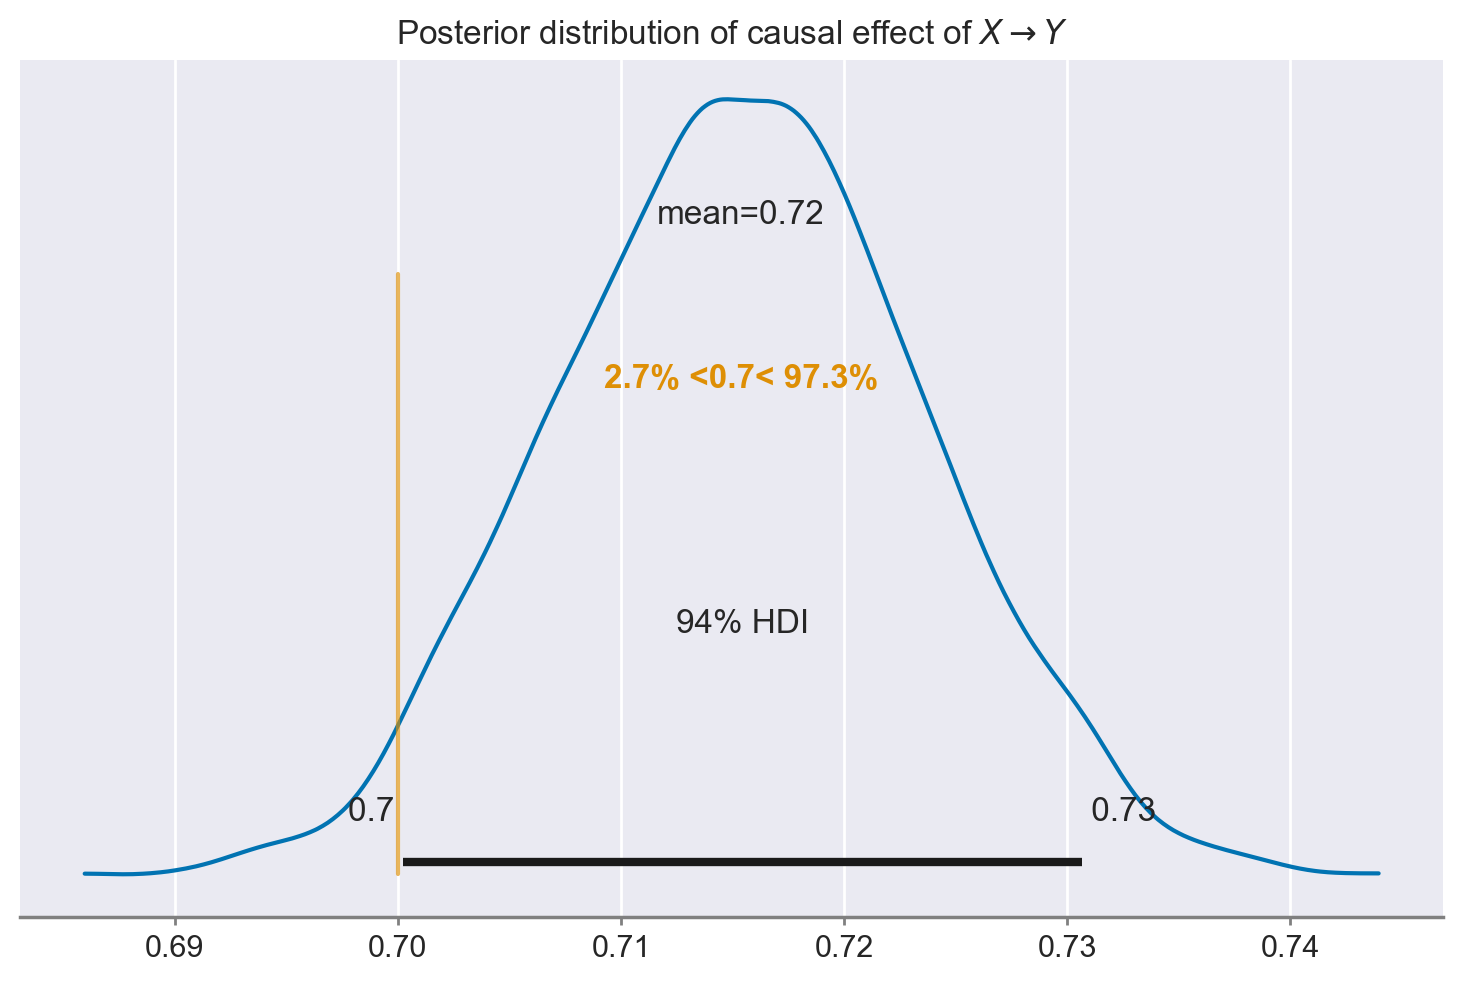

In [13]:
ax = az.plot_posterior(idata, var_names="xy", ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [14]:
%run ../wtrmrk.py

Watermark:
----------
Last updated: 2024-01-26T18:48:23.312873+01:00

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.3.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit


